In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import cv2
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tqdm import tqdm
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
from tensorflow.python.client import device_lib
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7314876610605937852
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9092134843251760314
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
def load_preprocess():
    ### Load In Data
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    return [trainX/255, trainY, testX/255, testY]

In [4]:
trainX, trainY, testX, testY = load_preprocess()

In [8]:
im_size =32
batch_size = 500
channels = 3
num_classes = 10
lr = 0.0001 ### learning rate
input_shape = ( im_size, im_size, channels)
l1_lambda = 0 ### L1 regularization lambda parameter

In [17]:
from tensorflow.keras.layers import BatchNormalization, Conv2D, GaussianNoise, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1

from tensorflow.keras.layers import BatchNormalization, Conv2D, GaussianNoise, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1

### Creating model architecture
he_init = tf.keras.initializers.VarianceScaling()
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(32, (3, 3),  activation='relu', 
                 kernel_initializer =he_init))

#model.add(GaussianNoise(0.01))
model.add(Conv2D(32, (3, 3),  activation='relu', 
                 kernel_initializer =he_init))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer =he_init))
#model.add(GaussianNoise(0.01))
model.add(Conv2D(128, (3, 3),  activation='relu', 
                 kernel_initializer =he_init))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3),  activation='relu', 
                 kernel_initializer =he_init))

#model.add(GaussianNoise(0.1))
model.add(Conv2D(256, (3, 3),  activation='relu', 
                 kernel_initializer =he_init))

#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu',  kernel_initializer =he_init))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu',kernel_initializer =he_init))
model.add(Dropout(0.5))
#model.add(GaussianNoise(0.01))
model.add(Dense(num_classes, activation='softmax', kernel_initializer =he_init))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 128)      

In [20]:
epochs = 250
batch_size = 100
model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = "categorical_crossentropy",  metrics= ['accuracy'])
modelHistory = model.fit(trainX,trainY, batch_size = batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/250
50000/50000 [==============================] - 24s 480us/sample - loss: 0.2814 - accuracy: 0.9119 - val_loss: 0.9042 - val_accuracy: 0.7914
Epoch 2/250
50000/50000 [==============================] - 24s 482us/sample - loss: 0.2765 - accuracy: 0.9137 - val_loss: 0.8089 - val_accuracy: 0.7970
Epoch 3/250
50000/50000 [==============================] - 24s 489us/sample - loss: 0.2840 - accuracy: 0.9104 - val_loss: 0.8125 - val_accuracy: 0.7994
Epoch 4/250
50000/50000 [==============================] - 24s 479us/sample - loss: 0.2592 - accuracy: 0.9176 - val_loss: 0.8747 - val_accuracy: 0.7949
Epoch 5/250
50000/50000 [==============================] - 24s 477us/sample - loss: 0.2507 - accuracy: 0.9199 - val_loss: 0.8566 - val_accuracy: 0.8012
Epoch 6/250
50000/50000 [==============================] - 24s 471us/sample - loss: 0.2567 - accuracy: 0.9190 - val_loss: 0.8414 - val_accuracy: 0.7929
Epoch 7/250
50000/50000 [=============

50000/50000 [==============================] - 25s 491us/sample - loss: 0.1784 - accuracy: 0.9475 - val_loss: 1.0018 - val_accuracy: 0.7989
Epoch 55/250
50000/50000 [==============================] - 24s 481us/sample - loss: 0.1890 - accuracy: 0.9455 - val_loss: 0.9439 - val_accuracy: 0.8019
Epoch 56/250
50000/50000 [==============================] - 24s 478us/sample - loss: 0.1802 - accuracy: 0.9464 - val_loss: 0.9237 - val_accuracy: 0.7929
Epoch 57/250
50000/50000 [==============================] - 24s 476us/sample - loss: 0.1822 - accuracy: 0.9471 - val_loss: 0.9765 - val_accuracy: 0.7984
Epoch 58/250
50000/50000 [==============================] - 24s 481us/sample - loss: 0.1779 - accuracy: 0.9475 - val_loss: 0.9533 - val_accuracy: 0.7995
Epoch 59/250
50000/50000 [==============================] - 24s 477us/sample - loss: 0.1808 - accuracy: 0.9478 - val_loss: 0.9738 - val_accuracy: 0.8033
Epoch 60/250
50000/50000 [==============================] - 24s 476us/sample - loss: 0.1784 - a

50000/50000 [==============================] - 24s 475us/sample - loss: 0.1668 - accuracy: 0.9538 - val_loss: 1.1077 - val_accuracy: 0.7983
Epoch 108/250
50000/50000 [==============================] - 23s 467us/sample - loss: 0.1612 - accuracy: 0.9555 - val_loss: 1.0408 - val_accuracy: 0.7984
Epoch 109/250
50000/50000 [==============================] - 23s 469us/sample - loss: 0.1574 - accuracy: 0.9565 - val_loss: 1.1023 - val_accuracy: 0.8027
Epoch 110/250
50000/50000 [==============================] - 23s 470us/sample - loss: 0.1676 - accuracy: 0.9551 - val_loss: 1.1036 - val_accuracy: 0.8033
Epoch 111/250
50000/50000 [==============================] - 23s 470us/sample - loss: 0.1589 - accuracy: 0.9571 - val_loss: 1.0679 - val_accuracy: 0.7978
Epoch 112/250
50000/50000 [==============================] - 23s 468us/sample - loss: 0.1632 - accuracy: 0.9548 - val_loss: 1.0059 - val_accuracy: 0.7967
Epoch 113/250
50000/50000 [==============================] - 23s 463us/sample - loss: 0.16

50000/50000 [==============================] - 23s 461us/sample - loss: 0.1566 - accuracy: 0.9585 - val_loss: 1.1632 - val_accuracy: 0.8014
Epoch 161/250
50000/50000 [==============================] - 23s 461us/sample - loss: 0.1572 - accuracy: 0.9582 - val_loss: 1.0691 - val_accuracy: 0.8039
Epoch 162/250
50000/50000 [==============================] - 23s 460us/sample - loss: 0.1544 - accuracy: 0.9591 - val_loss: 1.1272 - val_accuracy: 0.7913
Epoch 163/250
50000/50000 [==============================] - 23s 461us/sample - loss: 0.1584 - accuracy: 0.9588 - val_loss: 1.0917 - val_accuracy: 0.8038
Epoch 164/250
50000/50000 [==============================] - 23s 461us/sample - loss: 0.1505 - accuracy: 0.9600 - val_loss: 1.0642 - val_accuracy: 0.7949
Epoch 165/250
50000/50000 [==============================] - 23s 461us/sample - loss: 0.1535 - accuracy: 0.9602 - val_loss: 1.0887 - val_accuracy: 0.8043
Epoch 166/250
50000/50000 [==============================] - 23s 462us/sample - loss: 0.15

KeyboardInterrupt: 

In [33]:
history

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import cv2
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tqdm import tqdm
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.client import device_lib
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

print(device_lib.list_local_devices())
def load_preprocess():
    ### Load In Data
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = tf.keras.utils.to_categorical(trainY)
    testY = tf.keras.utils.to_categorical(testY)
    return [trainX/255, trainY, testX/255, testY]
trainX, trainY, testX, testY = load_preprocess()
im_size =32
batch_size = 500
channels = 3
num_classes = 100
lr = 0.001 ### learning rate
input_shape = ( im_size, im_size, channels)
l1_lambda = 0 ### L1 regular

In [34]:
num = len(history.history['val_loss'])
type(history.history)
history.history.keys()
print(len(history.history['val_loss']))
plt.plot([i for i in range(len(history.history['val_loss']))],history.history['val_loss'])

NameError: name 'history' is not defined

In [23]:
type(history.history)
print(history.history.keys())
print(len(history.history['val_loss']))
plt.plot([i for i in range(len(history.history['loss']))],history.history['loss'])

NameError: name 'history' is not defined

In [ ]:
plt.plot([i for i in range(len(history.history['loss']))],history.history['loss'])
plt.plot([i for i in range(len(history.history['val_loss']))],history.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel("# Of Epochs")
plt.ylabel

In [32]:
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png')


scores = model.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# Serialize model to JSON
model_json = model.to_json()
with open("Models/model_fine_labels.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
model.save_weights("Models/model_fine_labels.h5")
print("Saved model to disk")


accuracy: 80.04%
Saved model to disk


In [49]:
pred = model.predict(xtest)

(10000, 100)

b'mountain'


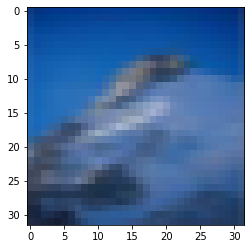

In [66]:
i = 418
plt.imshow(xtest[i].reshape((32,32,3)))
print(meta_data[b'fine_label_names'][np.argmax(ytest[i])])

b'seal'


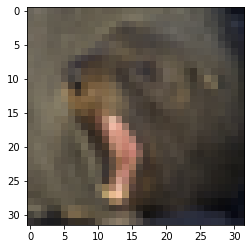

In [43]:
i = 42
plt.imshow(xtrain[i].reshape((32,32,3)))
print(meta_data[b'fine_label_names'][np.argmax(ytrain[i])])

In [ ]:

 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7535922723941363830
]


In [31]:
tf.__version__


'2.1.0'

Num GPUs Available:  1


In [46]:
np.argmax(ytest, axis = 1)

array([63, 13, 69, ..., 32, 89, 41], dtype=int64)

In [53]:
print("-Confusion matrix")
confuse = tf.math.confusion_matrix(np.argmax(ytest,axis = 1), np.argmax(pred, axis = 1), num_classes = 100)


-Confusion matrix
tf.Tensor(
[[72  1  1 ...  1  0  0]
 [ 0 51  3 ...  0  1  1]
 [ 0  0 31 ...  1  6  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 2  0  7 ...  0 28  0]
 [ 0  0  0 ...  0  2 35]], shape=(100, 100), dtype=int32)


In [55]:
import sys
import numpy
numpy.set_printoptions(threshold=np.inf)
print(confuse)

tf.Tensor(
[[72  1  1  1  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  1  4  0  0 10  0  0  0  0  0  0  0  0  0  0  0  1  1  0
   0  0  0  0  0  0  1  0  0  0  0  7  0  0  0  0  0  0  0  0  3  0  0  0
   0  1  0  0]
 [ 0 51  3  0  1  0  0  1  0  0  0  0  0  1  2  0  0  0  1  1  0  0  0  1
   0  0  2  0  0  2  1  0  1  2  0  0  0  1  0  0  0  0  0  0  1  1  0  0
   1  1  1  0  0  2  0  0  0  1  0  0  0  0  3  0  0  1  0  2  0  0  2  0
   0  1  2  0  0  2  0  0  0  0  1  0  0  0  0  0  0  0  2  2  2  4  0  0
   2  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0  1  4  0  0  0  0  0  0  0  1  0  0  0  0
   0  0  2  0  1  0  2  0  1  0  1  6  3  0  2  0  0  0  0  1  2  1  4  0
   0  0  2  0  0  0  0  0  0  0  0  0  0  2  0  0  2  1  1  0  0  0  0  0
   0  0  0  0  2  1  3  0  1  1  0  0  0  0  1  0  0  0  0  0  0  1  0  0
   0  1  6  0]
 [ 0  1  0 26  1  0  0  2  0  0  0  0  0  1  0  1  0  0 